<a href="https://colab.research.google.com/github/abhibrat/Bigram-Language-Model/blob/main/Bigram_Statistical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
words = open('names.txt', 'r').read().splitlines()

In [ ]:
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

Bigram Character Level Language Model - Statistical Modeling

In [ ]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs,chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1
    # print(ch1, ch2)

In [ ]:
sorted(b.items(), key = lambda kv: -kv[1])

In [2]:
import torch

In [3]:
N = torch.zeros((27,27), dtype=torch.int32)
# N = torch.ones((27,27), dtype=torch.int32)

In [ ]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
itos

In [5]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs,chs[1:]):
    idx1 = stoi[ch1]
    idx2 = stoi[ch2]
    N[idx1][idx2] += 1


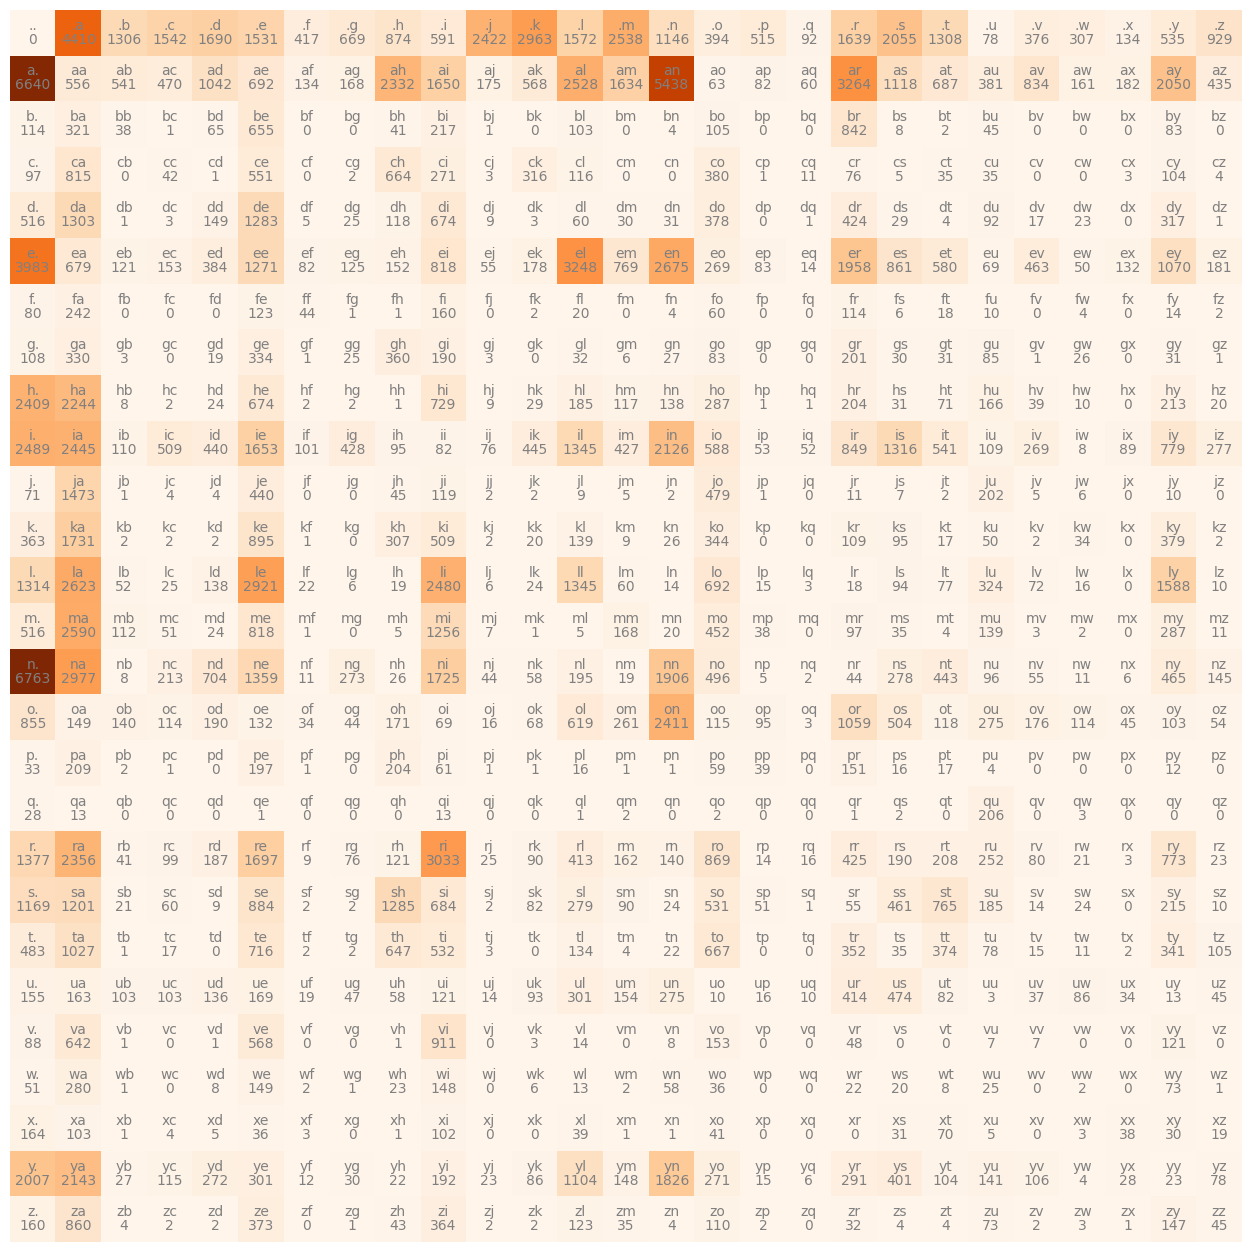

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Oranges')
for i in range(27):
  for j in range(27):
    chstr = itos[i] + itos[j]
    plt.text(j,i, chstr, ha='center', va='bottom', color='grey')
    plt.text(j,i, N[i][j].item(), ha='center', va='top', color='grey')
plt.axis('off');

In [ ]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [ ]:
p = N[0].float()
p = p/p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [ ]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
q = torch.rand(3)
p = p/p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [ ]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([1, 1, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
p = N[0].float()
p = p/p.sum()
idx = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[idx]

'd'

In [ ]:
g = torch.Generator().manual_seed(2147483647)
for i in range(20):
  idx = 0
  out = []
  while True:
    p = N[idx].float()
    p = p/p.sum()


    # p = torch.ones(27)/27.0 # for uniform distribution

    idx = torch.multinomial(p, num_samples=1, replacement=True).item()
    out.append(itos[idx])
    if idx == 0:
      break
  print(''.join(out))

dia.
ke.
nn.
ka.
th.
korki.
ssliarahatysegelihna.
h.
pemann.
leeylynidyaxoniviserm.
jeleenicaffs.
ahaenor.
my.
kig.
aryo.
ka.
liai.
aniynn.
tiyakluwus.
s.


In [7]:
P = (N+1).float()
P.sum()


tensor(228875.)

In [ ]:
A = torch.zeros(3,5)
A[1][0]=2
A[2][0]=3
A.sum(1, keepdim=True)

tensor([[0.],
        [2.],
        [3.]])

In [ ]:
P.sum(1, keepdim=True)

tensor([[32033.],
        [33885.],
        [ 2645.],
        [ 3532.],
        [ 5496.],
        [20423.],
        [  905.],
        [ 1927.],
        [ 7616.],
        [17701.],
        [ 2900.],
        [ 5040.],
        [13958.],
        [ 6642.],
        [18327.],
        [ 7934.],
        [ 1026.],
        [  272.],
        [12700.],
        [ 8106.],
        [ 5570.],
        [ 3135.],
        [ 2573.],
        [  929.],
        [  697.],
        [ 9776.],
        [ 2398.]])

In [8]:
P /= P.sum(1, keepdim=True)
#27, 27
#27, 1

#Broadcasting rules
#Two tensors are “broadcastable” if the following rules hold:
#Each tensor has at least one dimension.
#When iterating over the dimension sizes, starting at the trailing dimension,
#the dimension sizes must either be equal, one of them is 1, or one of them does not exist.

#When we want to divide the 27, 27 tensor by 27,1 tensor, the column vector is copied 27 times
# to make both tensors 27, 27

In [ ]:
P[0].sum()

tensor(1.)

In [9]:
g = torch.Generator().manual_seed(2147483647)
for i in range(20):
  idx = 0
  out = []
  while True:
    p = P[idx]
    # p = torch.ones(27)/27.0 # for uniform distribution

    idx = torch.multinomial(p, num_samples=1, replacement=True).item()
    out.append(itos[idx])
    if idx == 0:
      break
  print(''.join(out))

viaa.
ka.
galynanesabariteyl.
k.
jamioonencon.
ali.
aravenana.
ti.
jaledonnahon.
fagelecya.
konaikanadreh.
man.
azay.
aytyo.
isashnseslane.
ene.
kaqan.
elidaidjollond.
rh.
h.


In [10]:
log_likelihood=0
n=0
for w in words:
# for w in ['ana']:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs,chs[1:]):
    idx1 = stoi[ch1]
    idx2 = stoi[ch2]
    prob = P[idx1][idx2]
    logprob = torch.log(prob)
    log_likelihood+=logprob
    n+=1
    # print(f'{ch1}{ch2}: {prob: .4f} {logprob: .4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'average negative log likelihood = {nll/n}')

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
average negative log likelihood = 2.4543561935424805
